In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd
# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date
# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
#pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)
# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# считываем содержимое файла в объект DataFrame
df = pd.read_csv('Data/goog.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


### Мы можем сразу загрузить столбец с датами как даты, указав при загрузке в параметрах , **`parse_dates=['Date']`**:

In [4]:
df = pd.read_csv('Data/goog.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Volume
0,2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
1,2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2,2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
3,2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
4,2016-12-23,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,2017-03-13,844.000000,848.684998,843.250000,845.539978,1149500
57,2017-03-14,843.640015,847.239990,840.799988,845.619995,779900
58,2017-03-15,847.590027,848.630005,840.770020,847.200012,1379600
59,2017-03-16,849.030029,850.849976,846.130005,848.780029,970400


In [5]:
# проверяем, являются ли сейчас значения столбца
# Date датами, то есть фактически им присвоен
# тип Timestamp
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# к сожалению, индекс использует числовые значения,
# что затрудняет вывод данных по дате
df.index

RangeIndex(start=0, stop=61, step=1)

In [7]:
# считываем данные снова, теперь задаем столбец с датами
# в качестве индекса датафрейма
df = pd.read_csv('Data/goog.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...
2017-03-13,844.000000,848.684998,843.250000,845.539978,1149500
2017-03-14,843.640015,847.239990,840.799988,845.619995,779900
2017-03-15,847.590027,848.630005,840.770020,847.200012,1379600


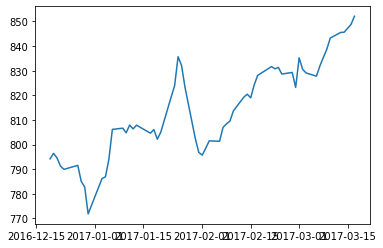

In [8]:
plt.plot(df.Close)

### Оптимизируем столбцы датафрейма с использованием категориальных переменных:

In [9]:
# создаем категориальную переменную непосредственно из списка
lmh_values = ["low", "high", "medium", "medium", "high"]
lmh_cat = pd.Categorical(lmh_values)
lmh_cat

['low', 'high', 'medium', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']

In [10]:
# смотрим категории
lmh_cat.categories

Index(['high', 'low', 'medium'], dtype='object')

In [11]:
# извлекаем значения
lmh_cat.codes

array([1, 0, 2, 2, 0], dtype=int8)

In [12]:
# создаем из списка, но при этом явно указываем категории
lmh_cat = pd.Categorical(lmh_values,
categories=["low", "medium", "high"])
lmh_cat

['low', 'high', 'medium', 'medium', 'high']
Categories (3, object): ['low', 'medium', 'high']

In [13]:
# создаем категориальную переменную с помощью объекта Series и dtype
cat_series = pd.Series(lmh_values, dtype="category")
cat_series

0       low
1      high
2    medium
3    medium
4      high
dtype: category
Categories (3, object): ['high', 'low', 'medium']

In [14]:
# создаем категориальную переменную с помощью метода .astype()
s = pd.Series(lmh_values)
as_cat = s.astype('category')
as_cat

0       low
1      high
2    medium
3    medium
4      high
dtype: category
Categories (3, object): ['high', 'low', 'medium']

### Используем `pd.cut` для создания доп. категориальных столбцов на основе имеющихся столбцов датафрейма:,

In [15]:
# создаем датафрейм из 100 значений
np.random.seed(123456)
values = np.random.randint(0, 100, 5)
bins = pd.DataFrame({ "Values": values})
bins

,Values
0,65
1,49
2,56
3,43
4,43


In [16]:
# разбиваем значения на 10 групп
bins['Group'] = pd.cut(values, range(0, 101, 10))
bins

,Values,Group
0,65,"(60, 70]"
1,49,"(40, 50]"
2,56,"(50, 60]"
3,43,"(40, 50]"
4,43,"(40, 50]"


In [17]:
# проверяем, является ли созданная переменная категориальной
bins.Group

0    (60, 70]
1    (40, 50]
2    (50, 60]
3    (40, 50]
4    (40, 50]
Name: Group, dtype: category
Categories (10, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

### Используем категориальные переменные для сравнения столбцов:

In [18]:
# создаем упорядоченную категориальную переменную из
# названий драгоценных металлов
# порядок важен для определения относительной
# ценности металла
metal_values = ["bronze", "gold", "silver", "bronze"]
metal_categories = ["bronze", "silver", "gold"]
metals = pd.Categorical(metal_values, categories=metal_categories, ordered = True)
metals

['bronze', 'gold', 'silver', 'bronze']
Categories (3, object): ['bronze' < 'silver' < 'gold']

In [19]:
# меняем значения
metals_reversed_values = pd.Categorical(metals[::-1],
                                        categories = metals.categories, ordered=True)
metals_reversed_values

['bronze', 'silver', 'gold', 'bronze']
Categories (3, object): ['bronze' < 'silver' < 'gold']

In [20]:
# сравниваем значения двух категориальных переменных
metals <= metals_reversed_values

array([ True, False,  True,  True])

### Используем pd.read_html для чтения таблиц непосредственно с сайта:

In [ ]:
# задаем URL-адрес HTML-файла
url = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/"
# читаем его
banks = pd.read_html(url)

# проверяем, как была прочитана
# часть первой таблицы
banks[0][0:5].iloc[:,0:2]

In [21]:
# считываем данные о котировках акций
df = pd.read_excel("Data/stocks.xlsx")
# записываем первые две строки в HTML
df.head(5).to_html("Data/stocks.html")
# смотрим HTML-файл в браузере

# ГЛАВА 11 ОБЪЕДИНЕНИЕ, СВЯЗЫВАНИЕ И ИЗМЕНЕНИЕ ФОРМЫ ДАННЫХ.

In [22]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd
# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date
# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
#pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)
# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

### Конкатенация данных, расположенных в нескольких объектах

In [23]:
# создаем два объекта DataFrame для конкатенации,
# используя те же самые индексные метки и имена столбцов,
# но другие значения
df1 = pd.DataFrame(np.arange(9).reshape(3, 3),
columns=['a', 'b', 'c'])
#df2 имеет значения 9 .. 18
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3),
columns=['a', 'b', 'c'])

In [24]:
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [25]:
df2

,a,b,c
0,9,10,11
1,12,13,14
2,15,16,17


In [26]:
pd.concat([df1, df2], sort=True)

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
0,9,10,11
1,12,13,14
2,15,16,17


In [27]:
# демонстрируем конкатенацию двух объектов DataFrame
# с разными столбцами
df1 = pd.DataFrame(np.arange(9).reshape(3, 3),
columns=['a', 'b', 'c'])
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3),
columns=['a', 'c', 'd'])

In [28]:
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [29]:
df2

,a,c,d
0,9,10,11
1,12,13,14
2,15,16,17


In [30]:
# выполняем конкатенацию, пропусками будут заполнены
# значения столбца d в датафрейме df1 и
# значения столбца b в датафрейме df2
pd.concat([df1, df2], sort=True)

,a,b,c,d
0,0,1.0,2,NaN
1,3,4.0,5,NaN
2,6,7.0,8,NaN
0,9,NaN,10,11.0
1,12,NaN,13,14.0
2,15,NaN,16,17.0


In [31]:
# выполняем конкатенацию двух объектов,
# но при этом создаем индекс с помощью
# заданных ключей
c = pd.concat([df1, df2], keys=['df1', 'df2'], sort=True)
# обратите внимание на метки строк в выводе
c

a    b   c     d
df1 0   0  1.0   2   NaN
    1   3  4.0   5   NaN
    2   6  7.0   8   NaN
df2 0   9  NaN  10  11.0
    1  12  NaN  13  14.0
    2  15  NaN  16  17.0

In [32]:
c.loc['df2']

,a,b,c,d
0,9,NaN,10,11.0
1,12,NaN,13,14.0
2,15,NaN,16,17.0


In [33]:
# конкатенируем датафреймы df1 и df2 по оси столбцов
# выравниваем по меткам строк,
# получаем дублирующиеся столбцы
pd.concat([df1, df2], axis=1)

,a,b,c,a,c,d
0,0,1,2,9,10,11
1,3,4,5,12,13,14
2,6,7,8,15,16,17


In [34]:
# создаем новый датафрейм d3, чтобы конкатенировать его
# с датафреймом df1
# датафрейм df3 имеет общую с датафреймом df1
# метку 2 и общий столбец a
df3 = pd.DataFrame(np.arange(20, 26).reshape(3, 2),columns=['a', 'd'],index=[2, 3, 4])
df3

,a,d
2,20,21
3,22,23
4,24,25


In [35]:
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [36]:
# конкатерируем их по оси столбцов. Происходит выравнивание по меткам строк,
# осуществляется заполнение значений столбцов df1, а затем
# столбцов df3, получаем дублирующиеся столбцы
pd.concat([df1, df3], axis=1)

,a,b,c,a,d
0,0.0,1.0,2.0,NaN,NaN
1,3.0,4.0,5.0,NaN,NaN
2,6.0,7.0,8.0,20.0,21.0
3,NaN,NaN,NaN,22.0,23.0
4,NaN,NaN,NaN,24.0,25.0


### Важно: указываем `join='inner'`, то есть в результате получим пересечение множеств, а не сумму как ранее:

In [37]:
# выполняем внутреннее соединение вместо внешнего
# результат представлен в виде одной строки
pd.concat([df1, df3], axis=1, join='inner')

,a,b,c,a,d
2,6,7,8,20,21


In [38]:
# добавляем ключи к столбцам
df = pd.concat([df1, df2], axis=1, keys=['df1', 'df2'])
df

df1       df2        
    a  b  c   a   c   d
0   0  1  2   9  10  11
1   3  4  5  12  13  14
2   6  7  8  15  16  17

In [39]:
df['df1']

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


### Присоединение вместо конкатенации

In [40]:
# метод .append() выполняет конкатенацию по оси острок (axis=0),
# в результате получаем дублирующиеся индексные метки строк - результат точно такой же
# как если бы pd.concat([df1, df2], sort=True)
df1.append(df2, sort=True)

,a,b,c,d
0,0,1.0,2,NaN
1,3,4.0,5,NaN
2,6,7.0,8,NaN
0,9,NaN,10,11.0
1,12,NaN,13,14.0
2,15,NaN,16,17.0


### Слияние данных, расположенных в нескольких объектах

In [41]:
# это наши клиенты
customers = {'CustomerID': [10, 11],
'Name': ['Mike', 'Marcia'],
'Address': ['Address for Mike',
'Address for Marcia']}
customers = pd.DataFrame(customers)
customers

,CustomerID,Name,Address
0,10,Mike,Address for Mike
1,11,Marcia,Address for Marcia


In [42]:
# это наши заказы, сделанные клиентами,
# они связаны с клиентами с помощью столбца CustomerID
orders = {'CustomerID': [10, 11, 10],
'OrderDate': [date(2014, 12, 1),
date(2014, 12, 1),
date(2014, 12, 1)]}
orders = pd.DataFrame(orders)
orders

,CustomerID,OrderDate
0,10,2014-12-01
1,11,2014-12-01
2,10,2014-12-01


In [43]:
# выполняем слияние датафреймов customers и orders так, чтобы
# мы могли отправить товары - аналог применения внешних ключей в SQL
customers.merge(orders)

,CustomerID,Name,Address,OrderDate
0,10,Mike,Address for Mike,2014-12-01
1,10,Mike,Address for Mike,2014-12-01
2,11,Marcia,Address for Marcia,2014-12-01


In [44]:
# создаем данные, которые будем использовать в качестве примеров
# в оставшейся части этого раздела
left_data = {'key1': ['a', 'b', 'c'],
'key2': ['x', 'y', 'z'],
'lval1': [ 0, 1, 2]}
right_data = {'key1': ['a', 'b', 'c'],
'key2': ['x', 'a', 'z'],
'rval1': [ 6, 7, 8 ]}
left = pd.DataFrame(left_data, index=[0, 1, 2])
right = pd.DataFrame(right_data, index=[1, 2, 3])

In [45]:
left

,key1,key2,lval1
0,a,x,0
1,b,y,1
2,c,z,2


In [46]:
right

,key1,key2,rval1
1,a,x,6
2,b,a,7
3,c,z,8


In [47]:
# демонстрируем слияние, не указывая столбцы, по которым
# нужно выполнить слияние
# этот программный код неявно выполняет слияние
# по всем общим столбцам
left.merge(right)

,key1,key2,lval1,rval1
0,a,x,0,6
1,c,z,2,8


In [48]:
# демонстрируем слияние, явно задав столбец,
# по значениям которого нужно связать
# объекты DataFrame
left.merge(right, on='key1')

,key1,key2_x,lval1,key2_y,rval1
0,a,x,0,x,6
1,b,y,1,a,7
2,c,z,2,z,8


In [49]:
# явно выполняем слияние с помощью двух столбцов
left.merge(right, on=['key1', 'key2'])

,key1,key2,lval1,rval1
0,a,x,0,6
1,c,z,2,8


### Самый общий примечательный момент. Объединяются два датафрейма без потери данных, создаются новые столбцы с переименованием столбцов если есть совпадения по именам столбцов, индексы выравниваются и добавляются новые индексы со второго датафрейма, пустые значения заполняются `Nan`:

In [50]:
# соединяем индексы строк обеих матриц
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,key1_x,key2_x,lval1,key1_y,key2_y,rval1
0,a,x,0.0,NaN,NaN,NaN
1,b,y,1.0,a,x,6.0
2,c,z,2.0,b,a,7.0
3,NaN,NaN,NaN,c,z,8.0


### Почти то же самое. Разница в том, что остаются только строки с общими строками:

In [51]:
# соединяем индексы строк обеих матриц
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,key1_x,key2_x,lval1,key1_y,key2_y,rval1
1,b,y,1,a,x,6
2,c,z,2,b,a,7


### Обратить внимание. Результат почти одинаковый. Разница в том, что во втором случае переименовываются общие столбцы:

In [52]:
pd.concat([df1, df3], axis=1, join='inner')

,a,b,c,a,d
2,6,7,8,20,21


In [53]:
pd.merge(df1, df3, left_index=True, right_index=True, how='inner')

,a_x,b,c,a_y,d
2,6,7,8,20,21


### Поворот данных для преобразования значений в индексы и наоборот

In [54]:
# считываем данные акселерометра
sensor_readings = pd.read_csv("Data/accel.csv")
sensor_readings

,interval,axis,reading
0,0,X,0.0
1,0,Y,0.5
2,0,Z,1.0
3,1,X,0.1
4,1,Y,0.4
...,...,...,...
7,2,Y,0.3
8,2,Z,0.8
9,3,X,0.3
10,3,Y,0.2


In [55]:
# поворачиваем данные. Интервалы становятся индексом, столбцы -
# это оси, а показания - значения столбцов
sensor_readings.pivot(index='interval', columns='axis', values='reading')

axis,X,Y,Z
interval,,,
0,0.0,0.5,1.0
1,0.1,0.4,0.9
2,0.2,0.3,0.8
3,0.3,0.2,0.7


In [56]:
# создаем датафрейм с двумя столбцами
df = pd.DataFrame({'a': [1, 2], 'b': [3, 4]}, index={'one', 'two'})
df

,a,b
one,1,3
two,2,4


In [57]:
# помещаем оба столбца в отдельный уровень индекса
stacked2 = df.stack()
stacked2

one  a    1
     b    3
two  a    2
     b    4
dtype: int64

In [58]:
# ищем значение с помощью индекса 'one' / 'b'
stacked2[('one', 'b')]

3

### Плюс проделанного выше превращения столбцов в дополнительный индекс (по сути поворот) в том, что обращение по индексу намного быстрее чем поиск путем `iloc`.

### Расстыковка с помощью иерархических индексов

In [59]:
# создаем две копии данных акселерометра,
# по одной для каждого пользователя
user1 = sensor_readings.copy()
user2 = sensor_readings.copy()
# добавляем столбец who в каждую копию
user1['who'] = 'Mike'
user2['who'] = 'Mikael'
# давайте отмасштабируем данные user2
user2['reading'] *= 100
# и организуем данные так, чтобы получить иерархический
# индекс строк
multi_user_sensor_data = pd.concat([user1, user2]) \
.set_index(['who', 'interval', 'axis'])
multi_user_sensor_data

reading
who    interval axis         
Mike   0        X         0.0
                Y         0.5
                Z         1.0
       1        X         0.1
                Y         0.4
...                       ...
Mikael 2        Y        30.0
                Z        80.0
       3        X        30.0
                Y        20.0
                Z        70.0

[24 rows x 1 columns]

### Так вот как это делается... Функция **`set_index(['who', 'interval', 'axis'])`** берет столбцы с соотв-ми наименованиями и превращает их в мультииндекс.

In [60]:
# извлекаем показания, относящиеся к пользователю Mike,
# с помощью индекса
multi_user_sensor_data.loc['Mike']

reading
interval axis         
0        X         0.0
         Y         0.5
         Z         1.0
1        X         0.1
         Y         0.4
...                ...
2        Y         0.3
         Z         0.8
3        X         0.3
         Y         0.2
         Z         0.7

[12 rows x 1 columns]

In [61]:
# извлекаем все показания по всем осям
# и по всем пользователям в интервале 1
multi_user_sensor_data.xs(1, level='interval')

reading
who    axis         
Mike   X         0.1
       Y         0.4
       Z         0.9
Mikael X        10.0
       Y        40.0
       Z        90.0

In [62]:
# выполняем расстыковку, в результате самый внутренний
# уровень индекса строк (уровень axis)
# стал уровнем индекса столбцов
multi_user_sensor_data.unstack()

reading             
axis                  X     Y      Z
who    interval                     
Mikael 0            0.0  50.0  100.0
       1           10.0  40.0   90.0
       2           20.0  30.0   80.0
       3           30.0  20.0   70.0
Mike   0            0.0   0.5    1.0
       1            0.1   0.4    0.9
       2            0.2   0.3    0.8
       3            0.3   0.2    0.7

In [63]:
# выполняем расстыковку по уровню 0
multi_user_sensor_data.unstack(level=0)

reading     
who            Mikael Mike
interval axis             
0        X        0.0  0.0
         Y       50.0  0.5
         Z      100.0  1.0
1        X       10.0  0.1
         Y       40.0  0.4
...               ...  ...
2        Y       30.0  0.3
         Z       80.0  0.8
3        X       30.0  0.3
         Y       20.0  0.2
         Z       70.0  0.7

[12 rows x 2 columns]

In [64]:
# выполняем расстыковку уровней
# who и axis
unstacked = multi_user_sensor_data.unstack(['who', 'axis'])
unstacked

reading                              
who         Mike           Mikael             
axis           X    Y    Z      X     Y      Z
interval                                      
0            0.0  0.5  1.0    0.0  50.0  100.0
1            0.1  0.4  0.9   10.0  40.0   90.0
2            0.2  0.3  0.8   20.0  30.0   80.0
3            0.3  0.2  0.7   30.0  20.0   70.0

In [65]:
# и, конечно, мы можем выполнить состыковку уровней,
# которые расстыковали
# выполняем состыковку уровня who
unstacked.stack(level='who')

reading             
axis                  X     Y      Z
interval who                        
0        Mikael     0.0  50.0  100.0
         Mike       0.0   0.5    1.0
1        Mikael    10.0  40.0   90.0
         Mike       0.1   0.4    0.9
2        Mikael    20.0  30.0   80.0
         Mike       0.2   0.3    0.8
3        Mikael    30.0  20.0   70.0
         Mike       0.3   0.2    0.7

### Расплавление данных для преобразования «широкого» формата в «длинный» и наоборот

In [66]:
# продемонстрируем расплавление
# с помощью этого датафрейма
data = pd.DataFrame({'Name' : ['Mike', 'Mikael'],
                     'Height' : [6.1, 6.0],'Weight' : [220, 185]})
data

,Name,Height,Weight
0,Mike,6.1,220
1,Mikael,6.0,185


In [67]:
# расплавляем датафрейм, используем Name
# в качестве идентификатора, а столбцы
# Height and Weight в качестве переменных
pd.melt(data, id_vars=['Name'], value_vars=['Height', 'Weight'])

,Name,variable,value
0,Mike,Height,6.1
1,Mikael,Height,6.0
2,Mike,Weight,220.0
3,Mikael,Weight,185.0


# ГЛАВА 12 АГРЕГИРОВАНИЕ ДАННЫХ

In [68]:
# загружаем данные датчиков
sensor_data = pd.read_csv("Data/sensors.csv")

In [69]:
sensor_data

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
...,...,...,...,...
19,2,orientation,Y,0.3
20,2,orientation,X,0.2
21,3,orientation,Z,0.0
22,3,orientation,Y,0.4


In [70]:
# группировка этих данных по столбцу/переменной sensor
# возвращает объект DataFrameGroupBy
grouped_by_sensor = sensor_data.groupby('sensor')
grouped_by_sensor

In [71]:
# получаем информацию о количестве групп,
# которые будут созданы
grouped_by_sensor.ngroups

2

In [72]:
# что представляют из себя найденные группы? будут указаны имена и индексы
grouped_by_sensor.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

In [73]:
# вспомогательная функция, печатающая содержимое групп
def print_groups (group_object):
    # итерируем по всем группам, печатая название группы
    # и первые пять наблюдений в группе
    for name, group in group_object:
        print (name)
        print (group[:5])

In [74]:
# смотрим содержимое созданных групп
print_groups(grouped_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [75]:
# получаем информацию о количестве элементов
# в каждой группе
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [76]:
# получаем данные конкретной группы
grouped_by_sensor.get_group('accel')[:5]

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [77]:
# извлекаем первые три строки в каждой группе
grouped_by_sensor.head(3)

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0


In [78]:
# группируем по значениям столбцов sensor и axis
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

### Группировка по уровням индекса

In [79]:
# создаем копию данных и заново индексируем ее
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [80]:
# группируем по первому уровню индекса
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


### Применение агрегирующих функций к группам

In [81]:
# вычисляем среднее для каждого сенсора/оси. дополнительно вычисляется среднее значение
# интервала, это мы просто игнорируем
sensor_axis_grouping = mi.groupby(level=['sensor', 'axis'])
sensor_axis_grouping.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [82]:
# вместо индекса, совпадающего с индексом исходного объекта,
# создаем числовой индекс и переносим уровни исходного
# индекса в столбцы
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

,sensor,axis,interval,reading
0,accel,X,1.5,0.85
1,accel,Y,1.5,0.35
2,accel,Z,1.5,0.15
3,orientation,X,1.5,0.15
4,orientation,Y,1.5,0.25
5,orientation,Z,1.5,0.00


In [83]:
# можно просто применить агрегирующую функцию к группе
sensor_axis_grouping.mean()

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [84]:
# применяем сразу несколько агрегирующих функций
sensor_axis_grouping.agg([np.sum, np.std])

interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [85]:
# применяем к каждому столбцу свою функцию
sensor_axis_grouping.agg({'interval' : len,'reading': np.mean})

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

# Преобразование групп данных

In [86]:
# создаем объект DataFrame, который
# будем использовать в примерах
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
'Values': [0, 1, 2, 3, 4],
'Values2': [5, 6, 7, 8, 9],
'Other': ['foo', 'bar', 'baz',
'fiz', 'buz']},
index = list('VWXYZ'))
transform_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


In [87]:
# сгруппируем по столбцу Label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [88]:
# добавляем 10 ко всем значениям во всех столбцах
grouped_by_label.transform(lambda x: x + 10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


In [89]:
df = pd.DataFrame({ 'Label': list("ABABAB"),
'Values': [10, 20, 11, np.nan, 12, 22]})
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [90]:
# вычисляем среднее для каждой группы
grouped.mean()

,Values
Label,
A,11.0
B,21.0


In [91]:
# используем метод .transform(), чтобы заполнить
# значения NaN групповым средним
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


### Вычисление нормализованных z-значений с помощью преобразования

In [92]:
# генерируем временной ряд со скользящими средними
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), pd.date_range('2013-01-01', periods=365*3))
periods = 100
rolling = data.rolling(window=periods,min_periods=periods,center=False).mean().dropna()

In [93]:
rolling

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 996, dtype: float64

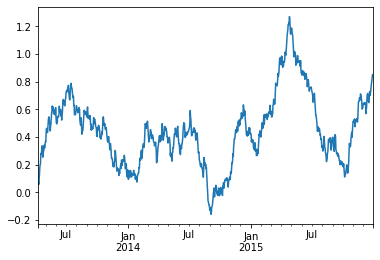

In [94]:
# визуализируем ряд
rolling.plot();

In [95]:
# вычисляем среднее и стандартное отклонение
# по каждому году
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

,mean,std
2013,0.454233,0.171988
2014,0.286502,0.182040
2015,0.599447,0.275786


In [96]:
# выполняем z-преобразование
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

,mean,std
2013,5.292341e-16,1.0
2014,-1.022014e-16,1.0
2015,2.281280e-16,1.0


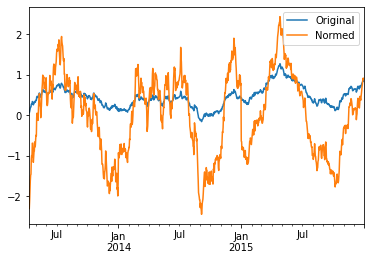

In [97]:
# визуализируем исходные и
# стандартизированные данные
compared = pd.DataFrame({ 'Original': rolling,
'Normed': normed })
compared.plot();

### Исключение групп из процедуры агрегирования

In [98]:
# создаем данные для наших примеров
df = pd.DataFrame({'Label': list('AABCCC'),
'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [99]:
# удаляем группы с одним непропущенным
# значением и меньше
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


In [100]:
# удаляем группы, в которых есть пропуски
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


In [101]:
# отбираем группы со средним 2.0 и выше
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0
